In [1]:
import nibabel as nib
import nilearn as nil
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os

In [2]:
rootDir = 'E:/datasets/' # os.path.expanduser('~') + '/DALLE/'
fMRIData = rootDir + 'BOLD5000/' + 'CSI1_TYPED/'

In [3]:
sessions = []
for filename in sorted(os.listdir(fMRIData)):
    sessions.append(filename)

In [4]:
sessions

['CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-01.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-02.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-03.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-04.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-05.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-06.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-07.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-08.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-09.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-11.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-12.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-13.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-14.nii.gz',
 'CSI1_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-15.nii.gz']

In [5]:
brain_vol = nib.load(fMRIData + sessions[0])

In [6]:
type(brain_vol)

nibabel.nifti1.Nifti1Image

In [7]:
print(brain_vol.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  71  89  72 370   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 244624
glmin           : -374421
descrip         : b''
aux_file        : b'none'
qform_code      : unknown
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [2. 0. 0. 2.]
srow_y 

In [8]:
brain_vol_data = brain_vol.get_fdata()

In [9]:
brain_vol_data.shape

(71, 89, 72, 370)

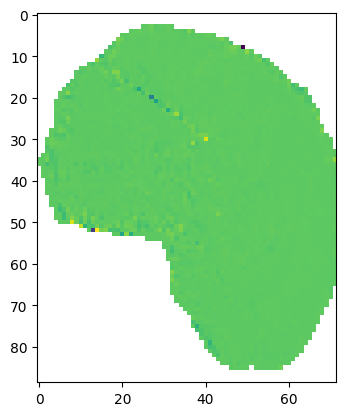

In [10]:
# displays nth slice of kth trial (image shown)
n = 35
k = 0
plt.imshow(brain_vol_data[n,:,:,k]);

In [11]:
from nilearn import image

ses_1 = image.load_img(fMRIData + sessions[0])
print(ses_1.shape)

(71, 89, 72, 370)


In [12]:
# raw data/beta values in matrix form (NOTE: a lot of nan values)
beta_mat = image.get_data(fMRIData + sessions[0])
beta_mat.shape

(71, 89, 72, 370)

In [13]:
# retrieve first volume
first_rsn = image.index_img(fMRIData + sessions[0], 0)
print(first_rsn.shape)

(71, 89, 72)


In [14]:
from nilearn import plotting

C:\Users\User\.conda\envs\nilearn\lib\site-packages\nilearn\_utils\niimg.py:63: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


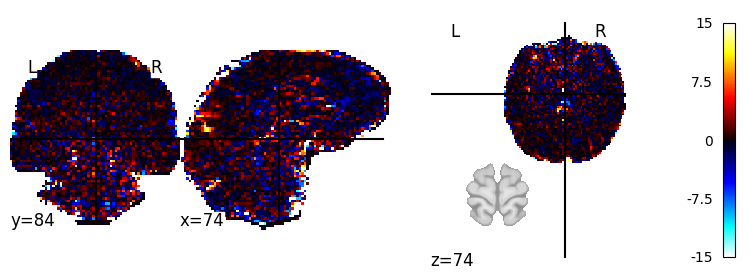

In [15]:
plotting.plot_stat_map(first_rsn, vmax=15);

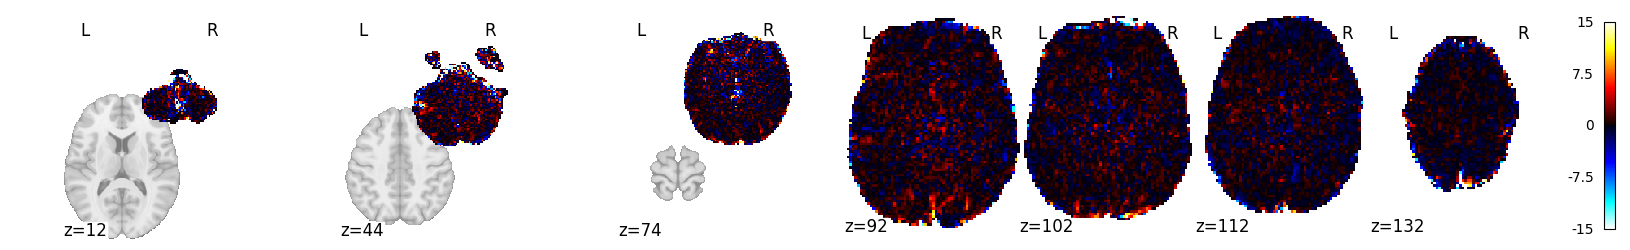

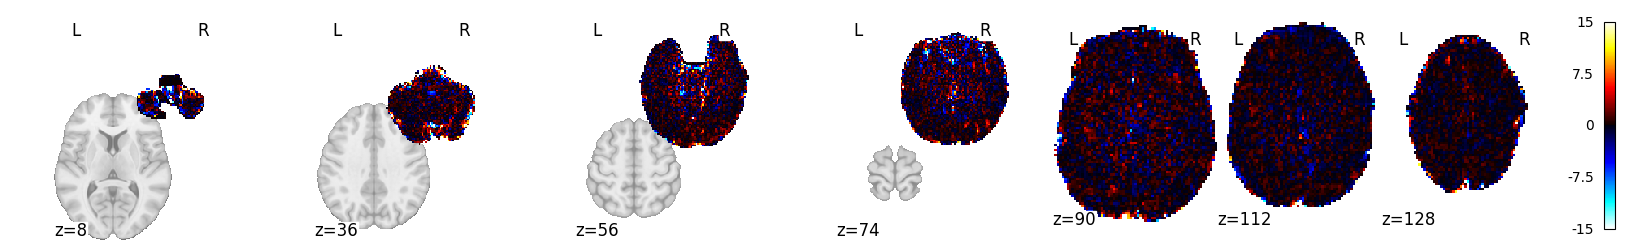

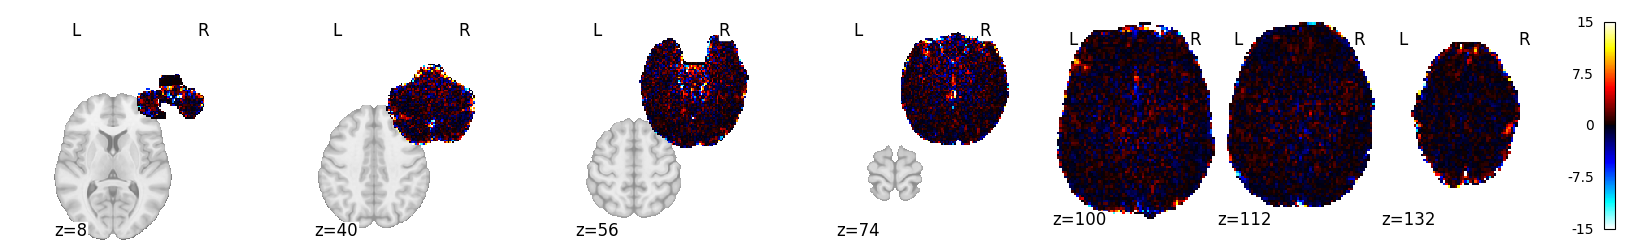

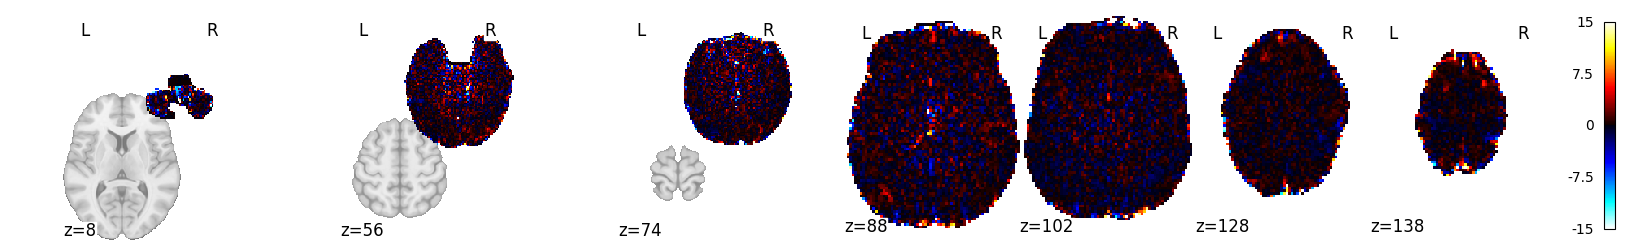

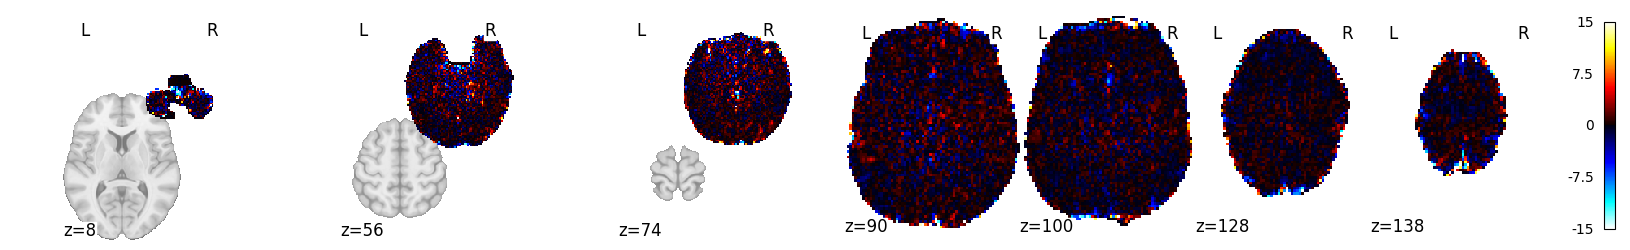

In [16]:
# Look at a range of volumes
selected_volumes = image.index_img(fMRIData + sessions[0], slice(0, 5))
for img in image.iter_img(selected_volumes):
    plotting.plot_stat_map(img, vmax=15, display_mode="z");

In [17]:
# Look at change in beta over time for voxels
vox1 = beta_mat[45, 60, 70, :]
vox2 = beta_mat[45, 60, 69, :]

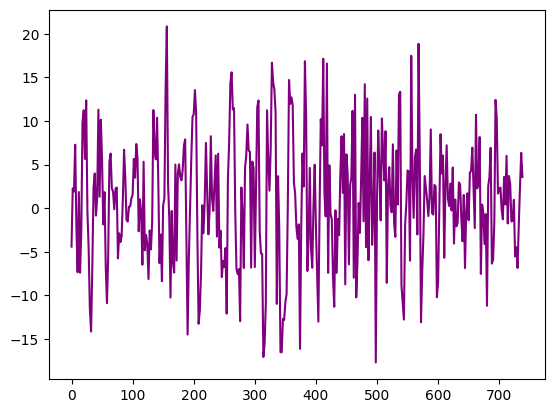

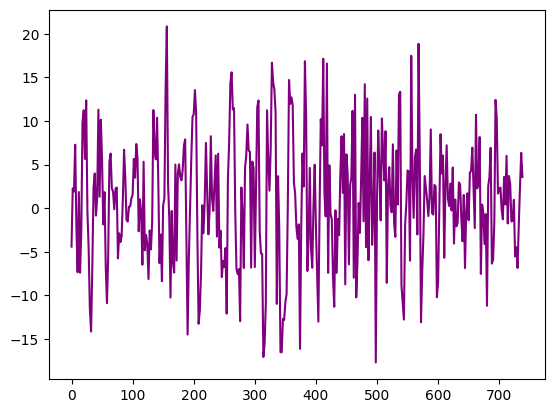

In [18]:
temporal_res = 2

for voxel in [vox1, vox2]:
    fig, ax = plt.subplots()
    plt.plot(range(0, 370*temporal_res, temporal_res), vox1, color='purple');

In [19]:
# Look at missing value counts
total_values = 71*89*72*370
nan_values = np.sum(np.isnan(beta_mat))
print(f"Total data points: {total_values}\nNull values: {nan_values}\nProportion Null: {nan_values/total_values}")

Total data points: 168338160
Null values: 95435580
Proportion Null: 0.5669277839320568


# ROI Masks

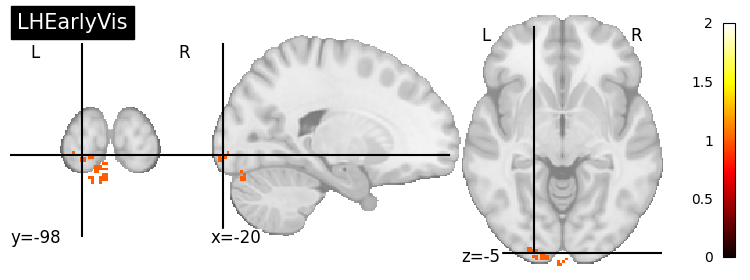

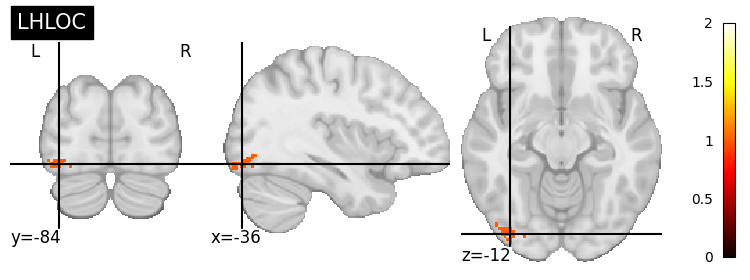

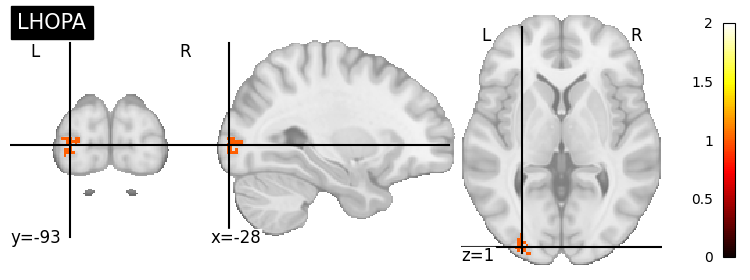

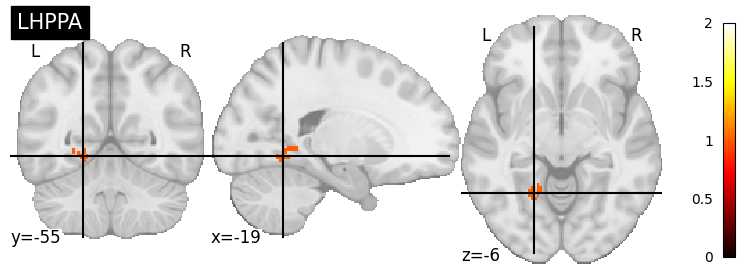

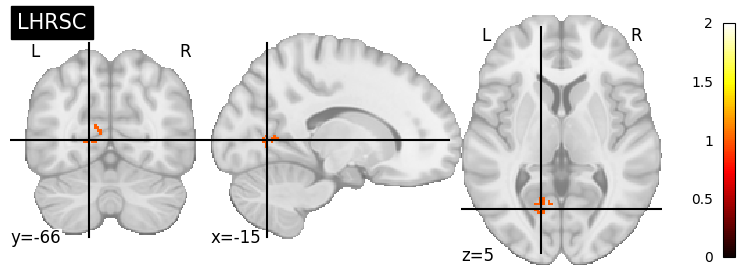

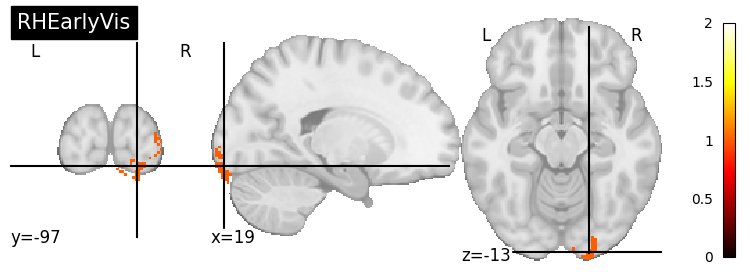

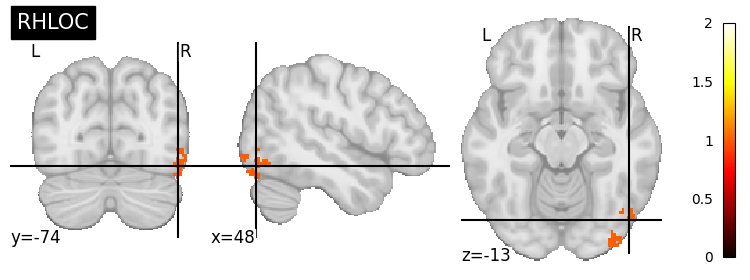

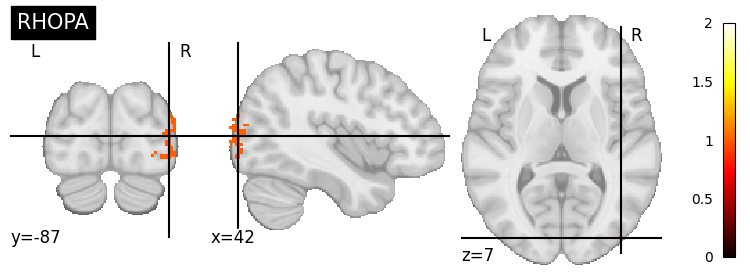

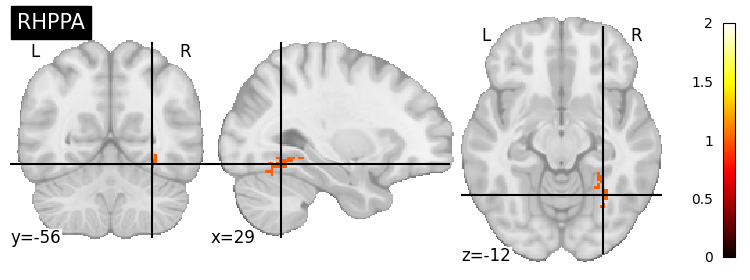

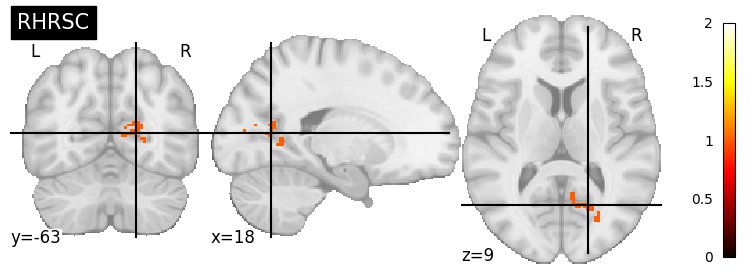

In [42]:
# take a look at given BOLD5000 ROI masks
roi_loc = rootDir + 'BOLD5000/roi_masks'
for file in os.listdir(roi_loc):
    region = file.split('-')[-1].split('.')[0]
    roi_mask = nib.load(f'{roi_loc}/{file}')
    plotting.plot_stat_map(roi_mask, vmax=2, title=region);

In [43]:
roi_mask_mat = roi_mask.get_fdata()
first_rsn_reg = first_rsn.get_fdata()[roi_mask_mat!=0]
first_rsn_reg

array([ 2.32613504e-01,  3.34995699e+00,  7.68851757e-01, -1.36043534e-01,
       -4.38640445e-01,  5.46811247e+00,  2.46379089e+00,  2.85552621e+00,
       -1.09698415e-01,  2.55173397e+00,  5.87526381e-01,  5.98505688e+00,
        1.87598467e+00,  8.85244489e-01,  3.65855742e+00,  1.39254689e+00,
        1.52368009e+00,  1.06994450e+00,  2.43169740e-01,  7.05523044e-03,
       -3.68291289e-01,  1.69128120e+00,  8.42475891e-01, -1.07034433e+00,
       -5.70835710e-01, -2.20742202e+00,  6.05488718e-02,  1.63515139e+00,
        1.35876751e+00,  8.45043004e-01, -1.29843146e-01, -1.17927814e+00,
       -1.92344081e+00,  3.94304156e-01,  2.72043675e-01,  8.18213344e-01,
        2.04903913e+00, -2.71539867e-01, -3.48060429e-01,  2.55743551e+00,
       -9.78858292e-01,  2.88681650e+00, -3.82659864e-03,  1.83030796e+00,
        2.94651961e+00,  8.27465475e-01,  1.07036471e+00, -5.86912334e-01,
       -2.14536452e+00, -2.73215264e-01, -7.95429587e-01, -1.56132913e+00,
       -3.81995469e-01, -

In [44]:
first_rsn_reg.shape

(143,)

In [46]:
## Details of region names and how ROI analysis was performed

In [45]:
# PPA: parahippocampal place area, RSC: retrosplenial complex, OPA: occipital place area,
# LOC: lateral occipital complex, EarlyVis: early visual (extends beyond V1 and V2)

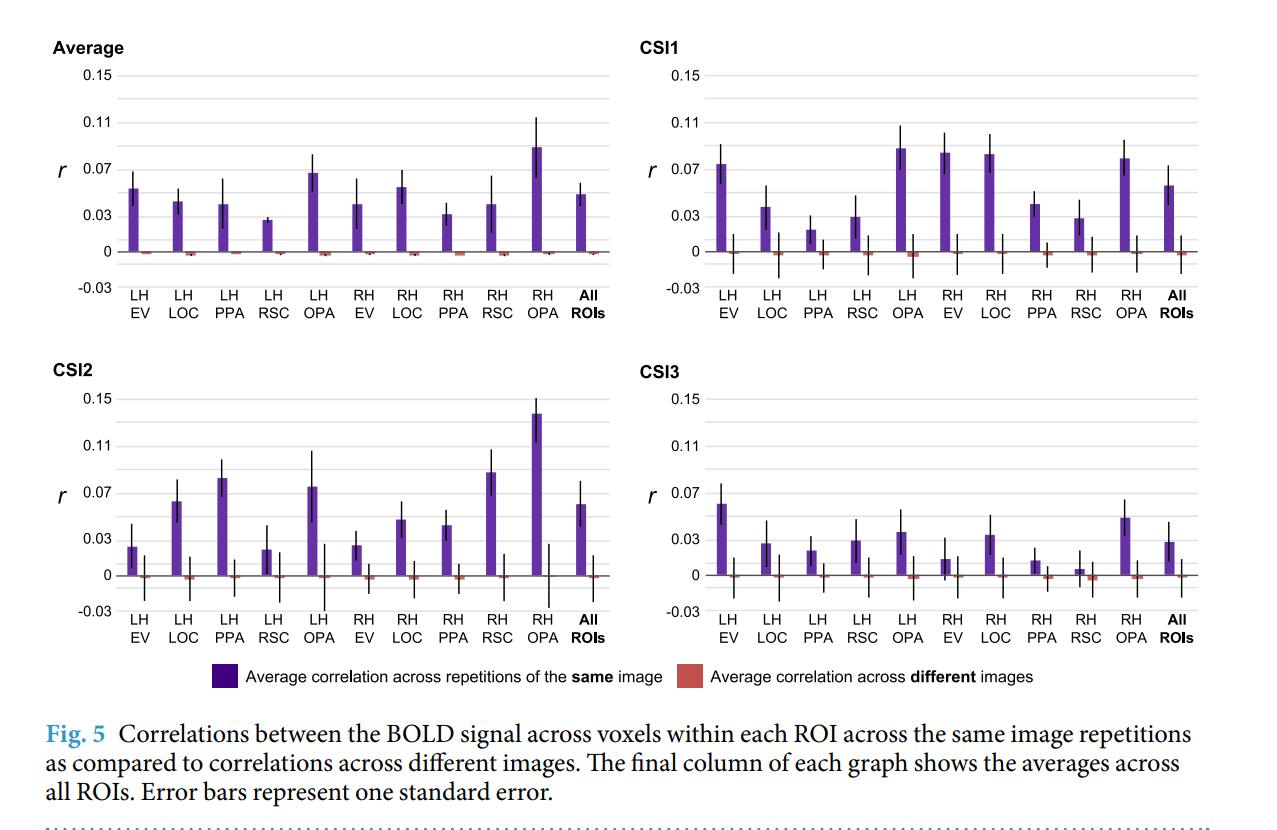

In [48]:
from IPython.display import Image
roi_comparison_filepath = rootDir + 'BOLD5000/figures/roi_comparison.png'
Image(roi_comparison_filepath)